In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import mad_std
%matplotlib inline

# Propagación de errores con Montecarlo

Esta forma de propagar errores es conveniente ya sea cuando tenemos una expresión complicada o podemos explotar las ventajas de poder programarlo.

## Ejemplo 1: Expresión simple y errores pequeños

Vamos a comparar primero con las fórmulas de propagación de errores que se usan habitualmente.

Supongamos que queremos calcular la densidad del hierro. Para esto hemos medido la masa y el volumen de un objeto hecho 100% de este material. Nuestras mediciones son bastante precisas (0.1 gr y 0.1 cm$^3$ de incertezas)

$$\rho = \frac{m}{V}$$

In [2]:
#Densidad del hierro (para comparación)
true_rho = 7.874 #En gr/cm^3

#Masa
mass  = 23.96 #gr
emass = 0.1 #Incerteza en la medición

#Volumen
vol   = 3.05 #en cm^3
evol  = 0.1

### Método con la fórmula

Tenemos una división, así que el error propagado (asumiendo variables independientes...) es
$$\sigma_{\rho}=\rho\sqrt{\left(\frac{\sigma_m}{m}\right)^2 + \left(\frac{\sigma_V}{V}\right)^2}$$

In [3]:
rho  = mass/vol
erho = rho * np.sqrt((emass/mass)**2 + (evol/vol)**2)

print('rho:\t\t', rho)
print('sigma_rho:\t', erho)

rho:		 7.855737704918034
sigma_rho:	 0.2596435960651886


Intentemos ahora samplear valores de una distribución normal, generada con las medias y varianzas determinadas por los valores de la medición.

In [4]:
masses = np.random.normal(mass, emass, size=25000)
vols   = np.random.normal(vol, evol, size=25000)

Y calculamos la densidad para cada par de samples, es decir

In [5]:
rhos = masses/vols

Hecho esto, podemos calcular la media y desviación estándar de los valores resultantes

In [6]:
print('rho:\t\t', np.median(rhos))
print('sigma_rho:\t', mad_std(rhos))

rho:		 7.854811301063741
sigma_rho:	 0.25803347221390166


Lo cual entrega valores muy cercanos a los obtenidos con la fórmula para propagar errores. Sin embargo, con esto también podemos ver la distribución de estos samples

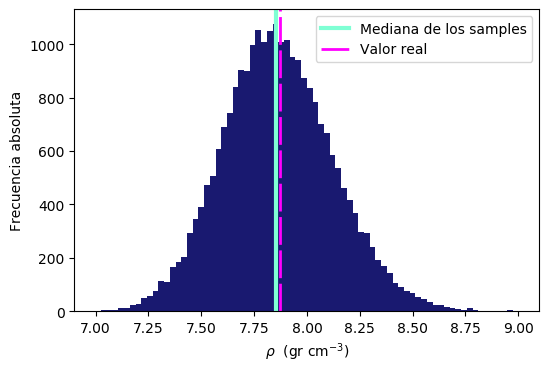

In [7]:
fig, ax = plt.subplots(dpi=100)
bins    = np.linspace(7,9,75)

ax.hist(rhos, bins=bins, color='midnightblue')
ax.axvline(np.median(rhos), color='aquamarine', lw=3, label='Mediana de los samples')
ax.axvline(true_rho, color='fuchsia', lw=2, dashes=(10,2), label='Valor real')

ax.set_xlabel(r'$\rho$  (gr cm$^{-3}$)')
ax.set_ylabel('Frecuencia absoluta')
ax.legend()

## Ejemplo 2: Expresión simple y errores grandes

Este ejemplo muestra la utilidad de poder visualizar y trabajar con la distribución anterior. Repetiremos el mismo código anterior, pero ahora supondremos que nuestros instrumentos no son muy precisos, midiendo incertezas mayores.

Recordemos que cuando usamos la fórmula de propagación, asumimos condiciones ideales (linealidad o bien expandimos en Taylor y truncamos, ignoramos correlaciones en la versión simple, que trabajamos con errores son pequeños y distribuyen de forma gaussiana).

In [8]:
#Masa
mass  = 23.96 #gr
emass = 2.5 #Incerteza en la medición

#Volumen
vol   = 3.05 #en cm^3
evol  = 1.5

rho  = mass/vol
erho = rho * np.sqrt((emass/mass)**2 + (evol/vol)**2)

print('rho:\t\t', rho)
print('sigma_rho:\t', erho)

rho:		 7.855737704918034
sigma_rho:	 3.949471009847434


Como no hemos cambiado los valores de la media, obtenemos un valor bueno para $\rho$, pero, como es de esperar, la incerteza aumenta, pues propagamos incertezas de mayor magnitud.

Veamos qué ocurre con los samples y la distribución.

rho:		 7.647121446225574
sigma_rho:	 3.534018977135151


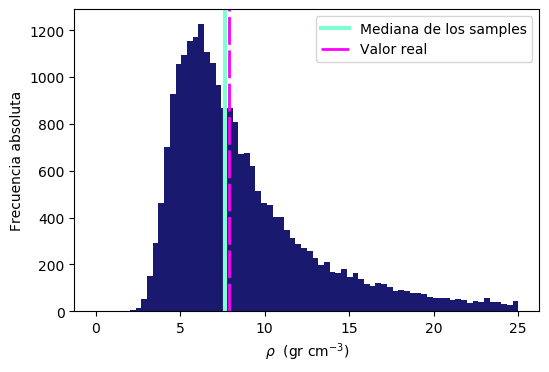

In [9]:
masses = np.random.normal(mass, emass, size=25000)
vols   = np.random.normal(vol, evol, size=25000)
rhos   = masses/vols

print('rho:\t\t', np.median(rhos))
print('sigma_rho:\t', mad_std(rhos))

fig, ax = plt.subplots(dpi=100)
bins    = np.linspace(0,25,75)

ax.hist(rhos, bins=bins, color='midnightblue')
ax.axvline(np.median(rhos), color='aquamarine', lw=3, label='Mediana de los samples')
ax.axvline(true_rho, color='fuchsia', lw=2, dashes=(10,2), label='Valor real')

ax.set_xlabel(r'$\rho$  (gr cm$^{-3}$)')
ax.set_ylabel('Frecuencia absoluta')
ax.legend()

Los valores dan nuevamente parecidos, consistentes entre sí y con el valor real. Sin embargo, podemos ver la distribución "de salida", la cual no se asemeja a una normal. Además, curiosamente, la mediana coincide con el valor real, pero si nos basamos en la distribución, nos cuestionaríamos nuestra manera de proceder.

## Ejemplo 3: Expresión complicada, errores pequeños

Ahora veremos el potencial para tratar con expresiones complejas para la propagación de errores. Supongamos que queremos estimar el momentum angular de un objeto moviéndose en una trayectoria circular.

Desgraciadamente, las mediciones que tenemos son de su masa, velocidad lineal, el radio y el ángulo dentro de la trayectoria circular. Esto implica que debemos calcular usando la ecuación

$$ L = mrv\sin\theta $$

Usando las fórmulas de propagación, esto implica una multiplicación de 4 términos y además ver lo que sucede con el termino $\sin$. Optamos por usar el método introducido en este notebook entonces

In [10]:
#Mediciones
mass   = 4.5 #en kg
emass  = 0.001

rad    = 1.2 #en m
erad   = 0.001

vel    = 1.12 #en m/s
evel   = 0.1

theta  = np.radians(62) #en rad
etheta = np.radians(0.1)

print('L:\t', mass*rad*vel*np.sin(theta),' kg m^2 / s')

L:	 5.34006704161079  kg m^2 / s


In [11]:
#Samples
masses = np.random.normal(mass, emass, size=25000)
rads   = np.random.normal(rad, erad, size=25000)
vels   = np.random.normal(vel, evel, size=25000)
ths    = np.random.normal(theta, etheta, size=25000)

Ls = masses*rads*vels*np.sin(ths)
print('L:\t', np.median(Ls), ' kg m^2 / s')
print('sigma_L:\t', mad_std(Ls), ' kg m^2 / s')

L:	 5.337994389449166  kg m^2 / s
sigma_L:	 0.4827071784127951  kg m^2 / s


L:		 5.337994389449166  kg m^2 / s
sigma_L:	 + 0.47840030977618575  - 0.4789533918349953  kg m^2 / s


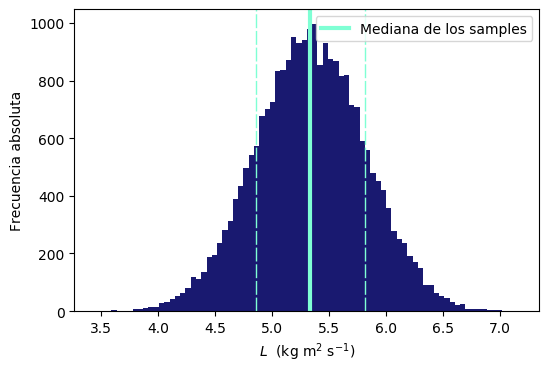

In [12]:
fig, ax = plt.subplots(dpi=100)
bins    = np.linspace(0,30,150)

perc = np.percentile(Ls, [50, 16, 84])
print('L:\t\t', np.median(Ls), ' kg m^2 / s')
print('sigma_L:\t', '+',perc[0] - perc[1], ' -', perc[2] - perc[0], ' kg m^2 / s')

ax.hist(Ls, bins=80, color='midnightblue')
ax.axvline(perc[0], color='aquamarine', lw=3, label='Mediana de los samples')
for p in perc[1:]:
    ax.axvline(p, color='aquamarine', lw=1, dashes=(10,2))

ax.set_xlabel(r'$L$  (kg m$^2$ s$^{-1}$)')
ax.set_ylabel('Frecuencia absoluta')
ax.legend()

Donde programarlo seguramente fue menos engorroso que obtener la expresión de propagación de errores a mano